# Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Dataset Path

In [ ]:
# Tentukan direktori dataset
dataset_dir = '/content/drive/MyDrive/Colab Notebooks/Pisang'

# Data Augmentation and Preprocessing

In [ ]:
# Data Augmentation untuk melatih model agar lebih generalisasi
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi nilai piksel dari 0-255 menjadi 0-1
    rotation_range=20,  # Rotasi gambar secara acak sebesar 20 derajat
    width_shift_range=0.2,  # Pergeseran horizontal secara acak
    height_shift_range=0.2,  # Pergeseran vertikal secara acak
    shear_range=0.2,  # Shearing gambar secara acak
    zoom_range=0.2,  # Zoom gambar secara acak
    horizontal_flip=True,  # Membalik gambar secara horizontal
    validation_split=0.2)  # Menyisihkan 20% data untuk validasi

# Preprocessing untuk data training dan validation
train_generator = train_datagen.flow_from_directory(
    dataset_dir,  # Direktori dataset
    target_size=(150, 150),  # Ubah ukuran gambar menjadi 150x150 piksel
    batch_size=32,  # Ukuran batch untuk setiap iterasi
    class_mode='binary',  # Karena kita punya 2 kelas (biner)
    subset='training')  # Data training

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',  # Karena kita punya 2 kelas (biner)
    subset='validation')  # Data validasi

Found 1508 images belonging to 2 classes.
Found 376 images belonging to 2 classes.


# Model CNN

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Mengurangi overfitting dengan dropout
    Dense(1, activation='sigmoid')  # Output 1 neuron dengan aktivasi sigmoid (biner)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

# Model Compilation

In [ ]:
model.compile(
    optimizer='adam',  # Optimizer Adam
    loss='binary_crossentropy',  # Binary crossentropy untuk klasifikasi biner
    metrics=['accuracy'])  # Metode evaluasi akurasi

# Model Training

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,  # Jumlah batch per epoch
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=20)  # Jumlah epoch (iterasi)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 1052s 20s/step - accuracy: 0.7310 - loss: 0.8266 - val_accuracy: 0.6477 - val_loss: 0.6922
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 1:46 2s/step - accuracy: 0.5938 - loss: 0.9016

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 245ms/step - accuracy: 0.5938 - loss: 0.9016 - val_accuracy: 0.7917 - val_loss: 0.4367
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.8485 - loss: 0.3010 - val_accuracy: 0.9375 - val_loss: 0.1163
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.9375 - loss: 0.1334 - val_accuracy: 0.9167 - val_loss: 0.1449
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9599 - loss: 0.1061 - val_accuracy: 0.9773 - val_loss: 0.0681
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.9375 - loss: 0.5300 - val_accuracy: 1.0000 - val_loss: 0.0346
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.9460 - loss: 0.1197 - val_accuracy: 0.9886 - val_loss: 0.0399
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 0.0432 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.9793 - loss: 0.0614 - val_accuracy: 0.9943 - val_los

# Visualisasi Hasil

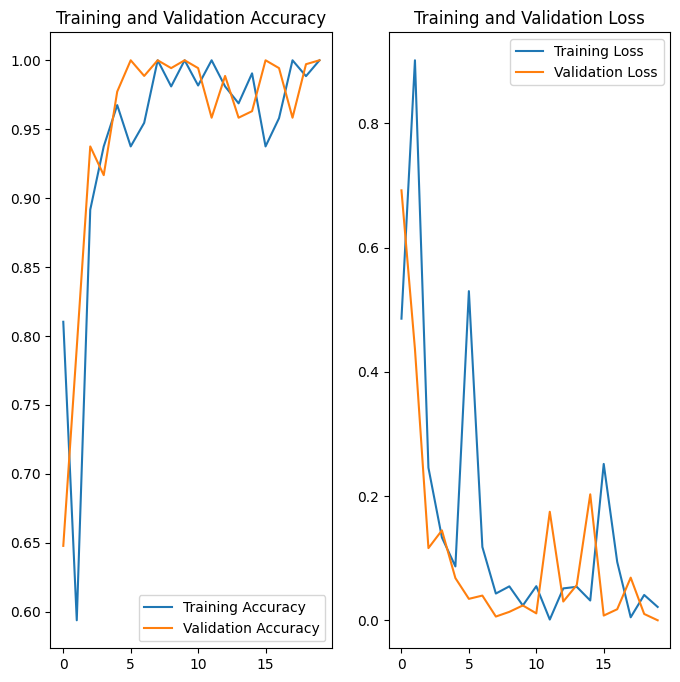

In [ ]:
# Langkah 6: Visualisasi Hasil Pelatihan
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save Model

In [ ]:
# # Langkah 7: Simpan Model Terlatih
# model.save('model_pisang.h5')

#Evaluasi Data

In [ ]:
# Langkah 8: Evaluasi dengan Data Baru (Opsional)
# Gunakan model untuk memprediksi gambar baru setelah model dilatih.
import numpy as np
from tensorflow.keras.preprocessing import image

# Contoh memuat gambar baru untuk prediksi
img_path = '/content/drive/MyDrive/Colab Notebooks/testpisang.jpeg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension

# Prediksi kematangan pisang
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("Pisang Matang (Kuning)")
else:
    print("Pisang Belum Matang (Hijau)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Pisang Matang (Kuning)
